In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.7 M

In [88]:
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from simpletransformers.classification import ClassificationModel
import torch

In [4]:
# authors and author paths
dir_data = f'./drive/MyDrive/DL-ENS/dataset'
authors_paths = [f'{dir_data}/wilde_complete.txt', f'{dir_data}/kipling_complete.txt']
authors_names = ["Wilde", "Kipling"]

In [51]:
# function to read the texts of an specific author
def read_texts(path: str, label, max_length = 350):
    text = ''
    with open(path, 'r+') as fd:
      text = fd.read()
    text_splited = text.split()
    dt = {'text': [], 'label': []}
    for i in range(0,len(text_splited),max_length):
      text = ' '.join(text_splited[i:min(i+max_length, len(text_splited))])
      dt['text'].append(text)
      dt['label'].append(label)
    return dt

In [52]:
# iterate through every author and build the dataset
dt = {'text': [], 'label': []}
for i,path in enumerate(authors_paths):
  dt_i = read_texts(path,i)
  dt['text'].extend(dt_i['text'])
  dt['label'].extend(dt_i['label'])

In [15]:
# for i in range(100):
#   dt['text'].append("Mi texto numero " + str(i))
#   dt['label'].append(i%2)

In [53]:
# convert the dataset to DataFrame
dt = DataFrame.from_dict(dt)
dt.head()

,text,label
0,SOME CRUELTIES OF PRISON LIFE. THE EDITOR OF T...,0
1,"of centralisation, of officialism, and of irre...",0
2,"warders, not unkindly men, were talking to him...",0
3,for the Prevention of Cruelty to Children woul...,0
4,"night, in a lonely dimly-lit cell, and is prey...",0


In [54]:
dt_train, dt_test = train_test_split(dt, test_size=0.2, random_state=42, shuffle=True)

In [55]:
dt_train.head()

,text,label
8076,the priest look very grave. Mowgli went on wit...,1
4560,"little at a time.' 'Oho!' said Kim, and held h...",1
4982,"smooth. ""It is the bone of a man's head,"" he s...",1
4981,hoard to which he is always adding; and though...,1
7492,"’em. Hold on, sergeant, I’ll light a pipe.” He...",1


In [56]:
dt_test.head()

,text,label
4985,"they thrust into the heads of elephants?"" ""To ...",1
4710,to pray for the end of the dinner. (Aloud.) Yo...,1
9414,who is going in his estimation to sell petty g...,1
8279,she made as though she would leap up to the be...,1
10419,"face towards the back of the seat, and from wh...",1


array([[<Axes: title={'center': 'label'}>]], dtype=object)

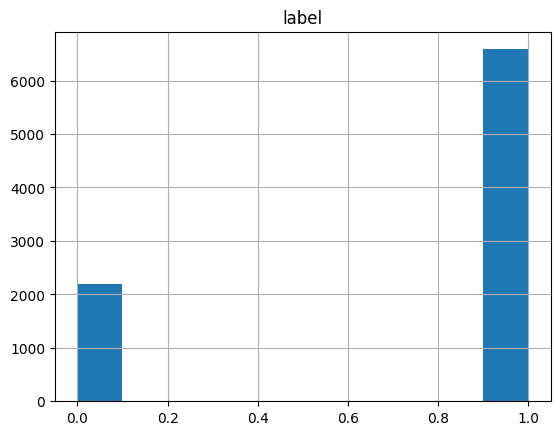

In [57]:
dt_train.hist()

array([[<Axes: title={'center': 'label'}>]], dtype=object)

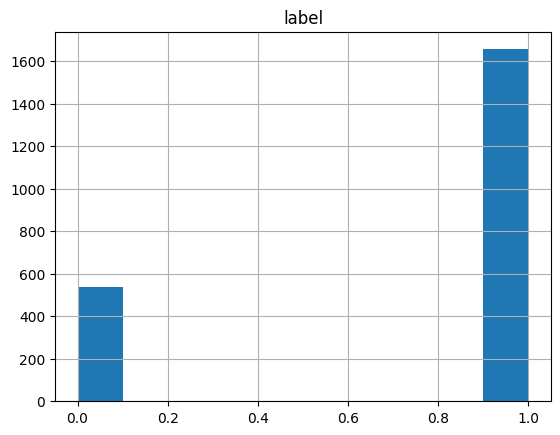

In [58]:
dt_test.hist()

In [59]:
# define model for classifier and initial weights
model_name = 'bert'
model_weights =  'bert-base-cased'

In [60]:
model = ClassificationModel(model_name, model_weights, num_labels=2, weight = [1 - sum(dt_train['label'])/len(dt_train['label']), sum(dt_train['label'])/len(dt_train['label'])], args={'reprocess_input_data': True, 'overwrite_output_dir': True,  'num_train_epochs' : 5}, use_cuda=True)
model.train_model(dt_train)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text an

  0%|          | 0/8769 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1097 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1097 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1097 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1097 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1097 [00:00<?, ?it/s]

(5485, 0.04423113262776645)

In [21]:
list(dt_test['text'])

['they thrust into the heads of elephants?" "To teach them Man\'s Law. Having neither claws nor teeth, men make these things--and worse." "Always more blood when I come near, even to the things the Man-Pack have made," said Mowgli, disgustedly. He was getting a little tired of the weight of the ankus. "If I had known this, I would not have taken it. First it was Messua\'s blood on the thongs, and now it is Hathi\'s. I will use it no more. Look!" The ankus flew sparkling, and buried itself point down thirty yards away, between the trees. "So my hands are clean of Death," said Mowgli, rubbing his palms on the fresh, moist earth. "The Thuu said Death would follow me. He is old and white and mad." "White or black, or death or life, I am going to sleep, Little Brother. I cannot hunt all night and howl all day, as do some folk." Bagheera went off to a hunting-lair that he knew, about two miles off. Mowgli made an easy way for himself up a convenient tree, knotted three or four creepers toget

In [50]:
count = 0
dt_wilde = read_texts(authors_paths[1],0)
for tex in list(dt_wilde['text']):
  if tex == '':
    count+=1
count/len(list(dt_wilde['text']))

['did', 'not', 'ask', 'me', 'to', 'draw', 'the', 'sword', 'When', 'they', 'stood', 'to', 'endure', 'their', 'lot,', 'What', 'they', 'only', 'looked', 'to', 'me', 'for', 'a', 'word,', 'And', 'I', 'answered', 'I', 'knew', 'them', 'not?', 'If', 'it', 'be', 'found,', 'when', 'the', 'battle', 'clears,', 'Their', 'death', 'has', 'set', 'me', 'free,', 'Then', 'how', 'shall', 'I', 'live', 'with', 'myself', 'through', 'the', 'years', 'Which', 'they', 'have', 'bought', 'for', 'me?', 'Brethren,', 'how', 'must', 'it', 'fare', 'with', 'me,', 'Or', 'how', 'am', 'I', 'justified,', 'If', 'it', 'be', 'proven', 'that', 'I', 'am', 'he', 'For', 'whom', 'mankind', 'has', 'died;', 'If', 'it', 'be', 'proven', 'that', 'I', 'am', 'he', 'Who', 'being', 'questioned', 'denied?', 'THE', 'END']


0.0

In [86]:
predictions, raw_out = model.predict(list(dt_test['text']))

  0%|          | 0/2193 [00:00<?, ?it/s]

  0%|          | 0/275 [00:00<?, ?it/s]

In [25]:
authors_names

['Wilde', 'Kipling']

In [87]:
print(classification_report(dt_test['label'], predictions, target_names = authors_names))

              precision    recall  f1-score   support

       Wilde       0.96      0.99      0.97       538
     Kipling       1.00      0.99      0.99      1655

    accuracy                           0.99      2193
   macro avg       0.98      0.99      0.98      2193
weighted avg       0.99      0.99      0.99      2193



In [89]:
# save model to drive
model_save_name = 'BertClassifier(BERTAA).pt'
path = f"./drive/My Drive/DL-ENS/{model_save_name}"
torch.save(model, path)